<a href="https://colab.research.google.com/github/ezzy4me/wipo_topicmodel/blob/main/Sportsbert_for_WIPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Topic Tracking for WIPO AI.

# environment setting

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install bertopic[visualization]

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.3 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-08-21 04:17:35--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
# from konlpy.tag import Mecab
from bertopic import BERTopic
# mecab = Mecab()


In [ ]:
# Visualization
import seaborn as sns

# preprocessing the raw data

In [ ]:
import csv
import pandas as pd
import re

In [ ]:
# load data
from glob import glob

to_sc = glob('/content/drive/MyDrive/tm_wipo/*.csv')

In [ ]:
to_sc

['/content/drive/MyDrive/tm_wipo/WIPO AI_sourcefile(20230818).csv']

In [ ]:
# for i in range(len(to_sc)):
#     dataframe1 = pd.read_csv(to_sc[i], engine='python', encoding = "ISO-8859-1", error_bad_lines=False)
#     globals()['df_vr_{}'.format(i)] = dataframe1[['patent_title', 'patent_date', 'patent_content']] # subset of original data
#     globals()['list_vr_{}'.format(i)] = [] # subset list of each original data

#     for j in range(len(dataframe1)):
#         # row[0] = re.sub('[^a-zA-Z0-9]',' ', row[0]).strip()
#         globals()['df_vr_{}'.format(i)].loc[j]['patent_content'] = re.sub('[^a-zA-Z]',' ', str(dataframe1.loc[j]['patent_content'])).strip()
#         globals()['df_vr_{}'.format(i)].loc[j]['patent_content'] = re.sub(" +", " ", globals()['df_vr_{}'.format(i)].loc[j]['patent_content'])

#         t = [globals()['df_vr_{}'.format(i)].loc[j]['patent_content']] #.values.tolist()#intermediate
#         globals()['list_vr_{}'.format(i)] += t


In [ ]:
dfs = []
for i in range(len(to_sc)):
    globals()['df_vr_{}'.format(i)] = pd.read_csv(to_sc[i], engine='python', encoding = "utf-8", error_bad_lines=False)
    dfs.append(globals()['df_vr_{}'.format(i)])

In [ ]:
df_vr_0

patent_number                                       patent_title  \
0           2859520  LARGE FOLLOWING/POPULAR COMPETITIVE ACTIVITIES...   
1         108079553                  SPORTS EQUIPMENT CARRYING VEHICLE   
2           1259428  PORTABLE APPARATUS FOR MAKING ATHLETIC NETS AN...   
3          2.02E+11                  AUTOMATED CRICKET TRAINING DEVICE   
4          2.02E+11      AI BASED 3-WHEELED HIGH-POWER MOUNTAIN E-BIKE   
...             ...                                                ...   
4753  1431/MUM/2012  SYMPTOM WEIGHTED IDENTIFICATION METHODOLOGY (S...   
4754    20110225519  SOCIAL MEDIA PLATFORM FOR SIMULATING A LIVE EX...   
4755      101833693  GENERALIZED APPROXIMATE CROSS VALIDATION METHO...   
4756    20090240113                             DIARY-FREE CALORIMETER   
4757        4338958  DETERMINATION OF OPTIMAL EXERCISE EFFORT CORRE...   

     patent_date                                     patent_content  \
0     18.02.2016  Hockey and Any All sports Hall Of Fame (baseba...   
1     29.05.2018  The invention discloses a sports equipment car...   
2     18.03.1996  A portable apparatus for making athletic nets ...   
3     11.03.2022  The present invention relates to an automated ...   
4     04.03.2022  AI based 3-wheeled high-power mountain e-bike ...   
...          ...                                                ...   
4753  20.12.2013  This method is an attempt to utilize the knowl...   
4754  15.09.2011  A social media platform is provided for sharin...   
4755  15.09.2010  The invention relates to model selection of a ...   
4756  24.09.2009  An indirect calorimeter estimates nutritional ...   
4757  19.05.1994  The method for determining the optimum effort ...   

     patent_nation  patent_url_num  \
0               CA      G99Z 99/00   
1               CN      A63B 71/00   
2               IT  A63B 20060101S   
3               IN          A63B /   
4               IN          B60L /   
...            ...             ...   
4753            IN      G06F 19/28   
4754            US      G06F 3/048   
4755            CN      G06N 99/00   
4756            US       A61B 5/00   
4757            DE      A63B 23/04   

                                             patent_url  
0     https://www.wipo.int/ipcpub/?symbol=G99Z009900...  
1     https://www.wipo.int/ipcpub/?symbol=A63B007100...  
2     https://www.wipo.int/ipcpub/?symbol=A63B%20200...  
3     https://www.wipo.int/ipcpub/?symbol=A63B%20/&m...  
4     https://www.wipo.int/ipcpub/?symbol=B60L%20/&m...  
...                                                 ...  
4753  https://www.wipo.int/ipcpub/?symbol=G06F001928...  
4754  https://www.wipo.int/ipcpub/?symbol=G06F000304...  
4755  https://www.wipo.int/ipcpub/?symbol=G06N009900...  
4756  https://www.wipo.int/ipcpub/?symbol=A61B000500...  
4757  https://www.wipo.int/ipcpub/?symbol=A63B002304...  

[4758 rows x 7 columns]

In [ ]:
# for df in dfs:
#     df.drop_duplicates(['patent_content'], inplace=True)

In [ ]:
df_vr_0['patent_content'].loc[1998]

"We disclose a digital vaccine system which presents a user-driven avatar with tasks that test the avatar's physical fitness and food offerings at various stages. The avatar's appearance is responsive to the avatar's performance on the tasks and selection of the food offerings. The digital vaccine system uses deep learning systems to configure and update its parameters."

In [ ]:
# 중복 제거한 DataFrame을 하나의 DataFrame으로 병합
merged_df = pd.concat(dfs, ignore_index=True)
new_df = merged_df[['patent_content', 'patent_date']].copy()

In [ ]:
# # 특정 단어가 포함된 문서 제거
# new_df = new_df[~new_df['patent_content'].str.contains('pet', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('juego', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('poker', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('card', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('dealer|casino|roulette|pachinko', na=False)]

In [ ]:
new_df.dropna().reset_index(drop=True)

patent_content patent_date
0     Hockey and Any All sports Hall Of Fame (baseba...  18.02.2016
1     The invention discloses a sports equipment car...  29.05.2018
2     A portable apparatus for making athletic nets ...  18.03.1996
3     The present invention relates to an automated ...  11.03.2022
4     AI based 3-wheeled high-power mountain e-bike ...  04.03.2022
...                                                 ...         ...
4747  This method is an attempt to utilize the knowl...  20.12.2013
4748  A social media platform is provided for sharin...  15.09.2011
4749  The invention relates to model selection of a ...  15.09.2010
4750  An indirect calorimeter estimates nutritional ...  24.09.2009
4751  The method for determining the optimum effort ...  19.05.1994

[4752 rows x 2 columns]

In [ ]:
df_without_null = new_df.dropna().reset_index(drop=True)

In [ ]:
df_without_null

patent_content patent_date
0     Hockey and Any All sports Hall Of Fame (baseba...  18.02.2016
1     The invention discloses a sports equipment car...  29.05.2018
2     A portable apparatus for making athletic nets ...  18.03.1996
3     The present invention relates to an automated ...  11.03.2022
4     AI based 3-wheeled high-power mountain e-bike ...  04.03.2022
...                                                 ...         ...
4747  This method is an attempt to utilize the knowl...  20.12.2013
4748  A social media platform is provided for sharin...  15.09.2011
4749  The invention relates to model selection of a ...  15.09.2010
4750  An indirect calorimeter estimates nutritional ...  24.09.2009
4751  The method for determining the optimum effort ...  19.05.1994

[4752 rows x 2 columns]

In [ ]:
# Change date to datetime format
df_without_null['patent_date'] = pd.to_datetime(df_without_null['patent_date'], format='%d.%m.%Y',  errors='coerce')
df_without_null.dropna(subset=['patent_date'], inplace=True)

In [ ]:
df_without_null.head()

patent_content patent_date
0  Hockey and Any All sports Hall Of Fame (baseba...  2016-02-18
1  The invention discloses a sports equipment car...  2018-05-29
2  A portable apparatus for making athletic nets ...  1996-03-18
3  The present invention relates to an automated ...  2022-03-11
4  AI based 3-wheeled high-power mountain e-bike ...  2022-03-04

In [ ]:
# df_without_null.drop_duplicates(subset='patent_content', inplace=True)

In [ ]:
df_without_null

patent_content patent_date
0     Hockey and Any All sports Hall Of Fame (baseba...  2016-02-18
1     The invention discloses a sports equipment car...  2018-05-29
2     A portable apparatus for making athletic nets ...  1996-03-18
3     The present invention relates to an automated ...  2022-03-11
4     AI based 3-wheeled high-power mountain e-bike ...  2022-03-04
...                                                 ...         ...
4747  This method is an attempt to utilize the knowl...  2013-12-20
4748  A social media platform is provided for sharin...  2011-09-15
4749  The invention relates to model selection of a ...  2010-09-15
4750  An indirect calorimeter estimates nutritional ...  2009-09-24
4751  The method for determining the optimum effort ...  1994-05-19

[4751 rows x 2 columns]

# examine the number of WIPO patents by year

<Axes: xlabel='year', ylabel='count'>

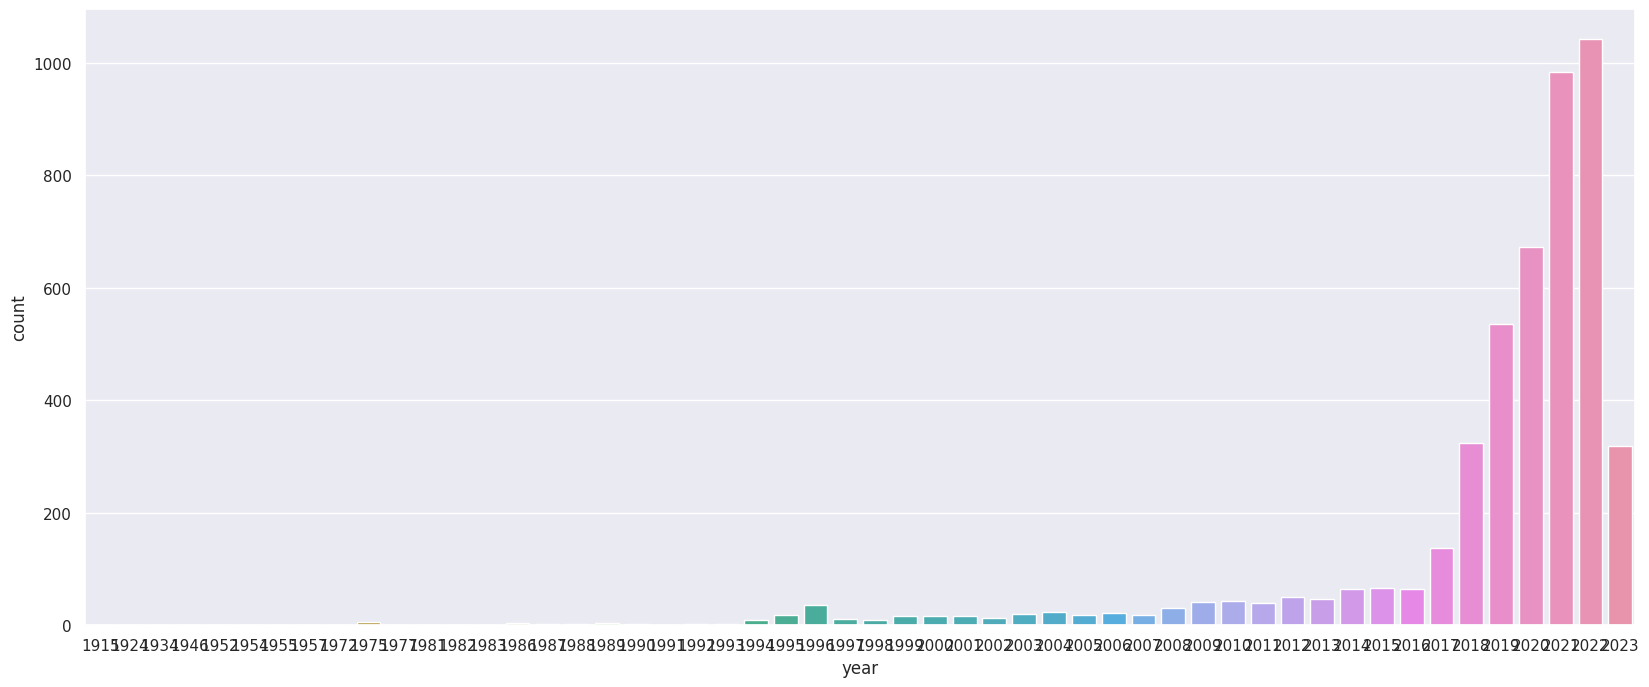

In [ ]:
# Create the year variable
df_without_null['year'] = pd.DatetimeIndex(df_without_null['patent_date']).year
df_without_null['year'] = df_without_null['year'].astype(int)
# Count plot
sns.set(rc={'figure.figsize':(20, 8)})
sns.countplot(df_without_null, x='year')

In [ ]:
year_count = df_without_null['year'].value_counts().sort_index()
year_count

1915       1
1924       1
1934       1
1946       1
1952       1
1954       1
1955       1
1957       1
1972       1
1975       5
1977       1
1981       1
1982       1
1983       1
1986       4
1987       3
1988       2
1989       4
1990       2
1991       1
1992       3
1993       2
1994      10
1995      18
1996      36
1997      12
1998      10
1999      16
2000      16
2001      16
2002      13
2003      20
2004      23
2005      18
2006      22
2007      18
2008      30
2009      42
2010      43
2011      39
2012      51
2013      47
2014      65
2015      67
2016      65
2017     137
2018     324
2019     536
2020     673
2021     984
2022    1043
2023     318
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

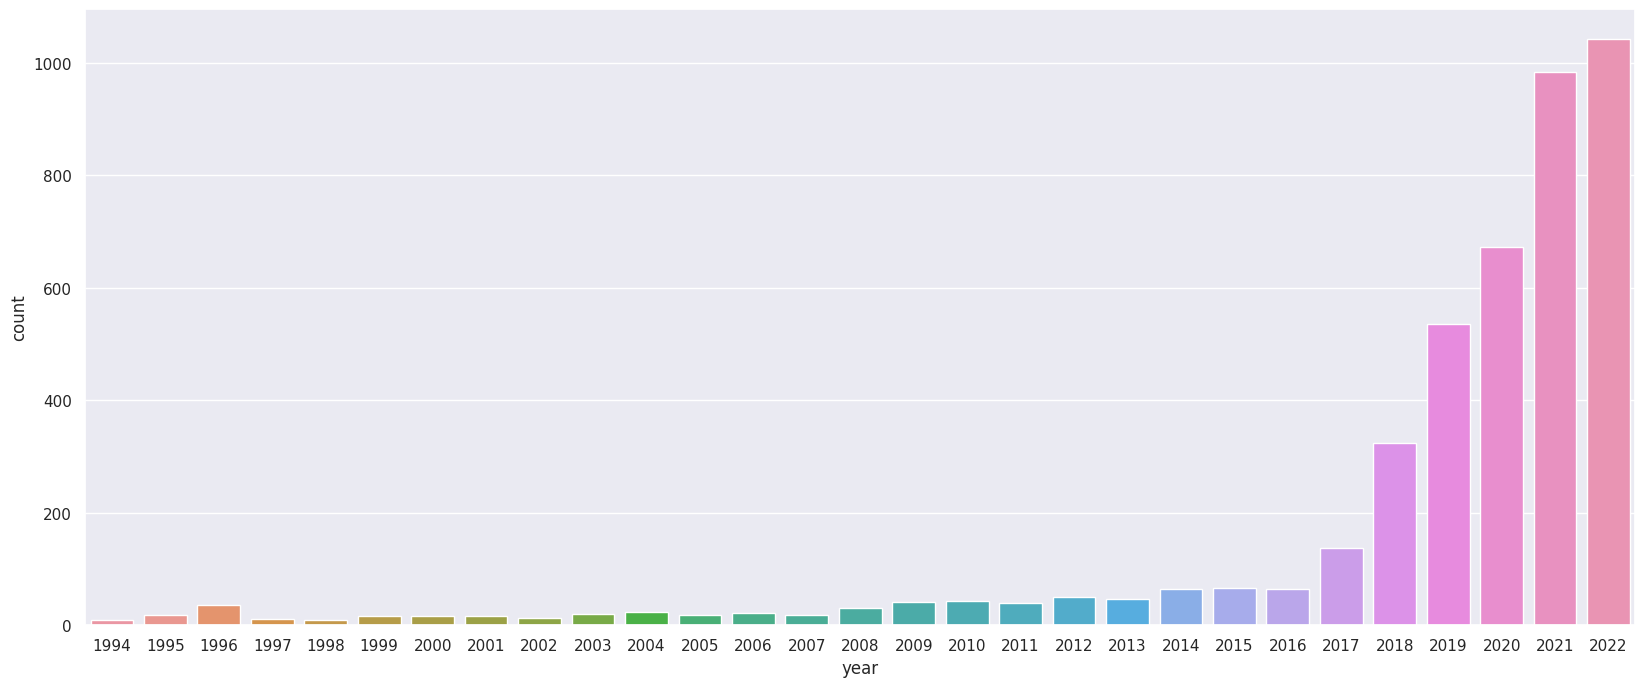

In [ ]:
df_without_null= df_without_null[df_without_null['year']>=1994]
df_without_null= df_without_null[df_without_null['year']<2023]
# Count plot
sns.set(rc={'figure.figsize':(20, 8)})
sns.countplot(df_without_null, x='year')

In [ ]:
data_above_1994 = df_without_null.loc[df_without_null['year'] >= 1994].reset_index(drop=True)
data_above_1994['patent_content'] = data_above_1994['patent_content'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
data_above_1994['patent_content'] = data_above_1994['patent_content'].str.lower()
data_above_1994

patent_content patent_date  year
0     hockey and any all sports hall of fame  baseba...  2016-02-18  2016
1     the invention discloses a sports equipment car...  2018-05-29  2018
2     a portable apparatus for making athletic nets ...  1996-03-18  1996
3     the present invention relates to an automated ...  2022-03-11  2022
4     ai based   wheeled high power mountain e bike ...  2022-03-04  2022
...                                                 ...         ...   ...
4389  this method is an attempt to utilize the knowl...  2013-12-20  2013
4390  a social media platform is provided for sharin...  2011-09-15  2011
4391  the invention relates to model selection of a ...  2010-09-15  2010
4392  an indirect calorimeter estimates nutritional ...  2009-09-24  2009
4393  the method for determining the optimum effort ...  1994-05-19  1994

[4394 rows x 3 columns]

# Remove Noises from Topic Top Words

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
# NLTK English stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
wipo_related_words = ['object', 'invention', 'embodiment', 'problem', 'area', 'mean', 'provide', 'figure',
                      'copyright', 'result', 'input', 'may', 'virtual', 'target', 'method', 'first', 'vr', 'arranged',
                      'second', 'predetermined', 'pet', 'breeding', 'jpo', 'acoustic', 'musical', 'dimples', 'dimple', 'mm', 'total', 'betting',
                      'according', 'could', 'players', 'picking', 'one', 'two', 'includes', 'early', 'least']

In [ ]:
stopwords.extend(wipo_related_words)

# Build a Topic Model

In [ ]:
from umap import UMAP

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("microsoft/SportsBERT")
sports_model = AutoModelForMaskedLM.from_pretrained("microsoft/SportsBERT")


In [ ]:
from bertopic.representation import MaximalMarginalRelevance

# representation_model = MaximalMarginalRelevance(diversity=0.2)

In [ ]:
# Initiate UMAP #72
umap_model = UMAP(n_neighbors=10,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=178)
# Count vectorizer
vectorizer_model = CountVectorizer(stop_words=stopwords)
# vectorizer_model = CountVectorizer()

In [ ]:
# Initiate BERTopic
topic_model = BERTopic(embedding_model=sports_model,
                       umap_model=umap_model,
                       vectorizer_model=vectorizer_model,
                       min_topic_size=25,
                       top_n_words=10,
                       calculate_probabilities=True)
# representation_model=representation_model,

# Run BERTopic model
topics, probs = topic_model.fit_transform(data_above_1994['patent_content'])
# Get the list of topics
topic_model.get_topic_info()

Topic  Count                                     Name  \
0      -1   1409          -1_data_system_user_information   
1       0    579            0_climbing_end_connected_body   
2       1    229                1_sports_game_video_event   
3       2    212            2_human_skeleton_body_posture   
4       3    209           3_data_cycle_product_equipment   
5       4    185       4_image_skeleton_model_dimensional   
6       5    167                   5_water_heat_tank_pipe   
7       6    150                 6_c1_alkyl_halo_hydrogen   
8       7    149          7_lithium_battery_electrode_ion   
9       8    129            8_ball_tennis_table_badminton   
10      9    124        9_health_patient_user_information   
11     10    109  10_algorithm_power_optimization_optimal   
12     11     94            11_fitness_exercise_user_data   
13     12     74           12_signal_memory_circuit_power   
14     13     72          13_swimming_pool_drowning_water   
15     14     70            14_camera_device_movies_plate   
16     15     68                15_golf_swing_golfer_club   
17     16     65           16_fish_robot_water_underwater   
18     17     48                17_growth_plant_soil_crop   
19     18     39   18_heart_cardiac_ecg_electrocardiogram   
20     19     36     19_question_module_teaching_learning   
21     20     32          20_heat_thermal_substrate_steel   
22     21     31           21_washing_laundry_machine_tub   
23     22     30     22_exercise_user_associated_activity   
24     23     29          23_treadmill_running_speed_belt   
25     24     28              24_racing_car_race_computer   
26     25     27                25_rpa_graph_nodes_agents   

                                       Representation  \
0   [data, system, user, information, learning, ex...   
1   [climbing, end, connected, body, plate, frame,...   
2   [sports, game, video, event, player, odds, dat...   
3   [human, skeleton, body, posture, recognition, ...   
4   [data, cycle, product, equipment, model, test,...   
5   [image, skeleton, model, dimensional, three, h...   
6   [water, heat, tank, pipe, gas, air, pump, pipe...   
7   [c1, alkyl, halo, hydrogen, alkoxy, resin, com...   
8   [lithium, battery, electrode, ion, material, e...   
9   [ball, tennis, table, badminton, device, net, ...   
10  [health, patient, user, information, data, blo...   
11  [algorithm, power, optimization, optimal, gene...   
12  [fitness, exercise, user, data, information, s...   
13  [signal, memory, circuit, power, voltage, curr...   
14  [swimming, pool, drowning, water, underwater, ...   
15  [camera, device, movies, plate, cable, televis...   
16  [golf, swing, golfer, club, player, forces, ba...   
17  [fish, robot, water, underwater, swimming, cul...   
18  [growth, plant, soil, crop, irrigation, crops,...   
19  [heart, cardiac, ecg, electrocardiogram, monit...   
20  [question, module, teaching, learning, knowled...   
21  [heat, thermal, substrate, steel, insulation, ...   
22  [washing, laundry, machine, tub, drum, configu...   
23  [exercise, user, associated, activity, attribu...   
24  [treadmill, running, speed, belt, control, fix...   
25  [racing, car, race, computer, controlled, game...   
26  [rpa, graph, nodes, agents, learning, interact...   

                                  Representative_Docs  
0   [A method and system for activity classificati...  
1   [The embodiment of the utility model discloses...  
2   [The invention provides a structured informati...  
3   [The invention discloses a human body behavior...  
4   [The invention discloses a data service implem...  
5   [The embodiment of the invention discloses a t...  
6   [The invention provides a water heater control...  
7   [Disclosed is an alkali aqueous flocculating a...  
8   [PROBLEM TO BE SOLVED: To provide a lithium io...  
9   [The utility model relates to the technical fi...  
10  [A personal health record (PHR) is an electron...  
11  [The invention relates

In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/tm_wipo/model')

In [ ]:
# model save
# topic_model.save("4_sports_bertopic_wipo_time0526")
# # model load
# # topic_model.load("sports_bertopic_wipo_time")

In [ ]:
# topic_model = topic_model.load("4_sports_bertopic_wipo_time0526")

In [ ]:
import numpy as np

for i in range(0, 30):
    topic_matrix = topic_model.get_topic(i)
    if topic_matrix is not None and isinstance(topic_matrix, bool) is False:
        result = [(word, round(value, 4)) for word, value in topic_matrix]
        print(i, '번째 토픽:', result)
    elif topic_matrix is None:
        print(i, '번째 토픽: 존재하지 않음')
    else:
        print(i, '번째 토픽: 예외 처리 필요')

0 번째 토픽: [('climbing', 0.0312), ('end', 0.0245), ('connected', 0.0228), ('body', 0.0226), ('plate', 0.0212), ('frame', 0.0212), ('side', 0.0205), ('supporting', 0.0197), ('device', 0.0193), ('wheel', 0.0191)]
1 번째 토픽: [('sports', 0.0525), ('game', 0.0497), ('video', 0.0496), ('event', 0.0304), ('player', 0.0266), ('odds', 0.0239), ('data', 0.0235), ('information', 0.0222), ('learning', 0.0198), ('system', 0.0175)]
2 번째 토픽: [('human', 0.0643), ('skeleton', 0.0474), ('body', 0.042), ('posture', 0.0409), ('recognition', 0.036), ('motion', 0.0338), ('action', 0.0335), ('image', 0.03), ('video', 0.0294), ('behavior', 0.0281)]
3 번째 토픽: [('data', 0.0421), ('cycle', 0.0258), ('product', 0.0247), ('equipment', 0.0242), ('model', 0.0224), ('test', 0.0223), ('management', 0.0217), ('life', 0.0214), ('ai', 0.0208), ('system', 0.0207)]
4 번째 토픽: [('image', 0.0692), ('skeleton', 0.0581), ('model', 0.0398), ('dimensional', 0.039), ('three', 0.0317), ('human', 0.0286), ('deep', 0.026), ('learning', 0.0

# Topics Over Time

In [ ]:
data_above_1994 = df_without_null.loc[df_without_null['year'] >= 1994].reset_index(drop=True)
data_above_1994

patent_content patent_date  year
0     Hockey and Any All sports Hall Of Fame (baseba...  2016-02-18  2016
1     The invention discloses a sports equipment car...  2018-05-29  2018
2     A portable apparatus for making athletic nets ...  1996-03-18  1996
3     The present invention relates to an automated ...  2022-03-11  2022
4     AI based 3-wheeled high-power mountain e-bike ...  2022-03-04  2022
...                                                 ...         ...   ...
4389  This method is an attempt to utilize the knowl...  2013-12-20  2013
4390  A social media platform is provided for sharin...  2011-09-15  2011
4391  The invention relates to model selection of a ...  2010-09-15  2010
4392  An indirect calorimeter estimates nutritional ...  2009-09-24  2009
4393  The method for determining the optimum effort ...  1994-05-19  1994

[4394 rows x 3 columns]

In [ ]:
# Topics over time
topics_over_time = topic_model.topics_over_time(data_above_1994['patent_content'],
                                                data_above_1994['patent_date'],
                                                global_tuning=True,
                                              evolution_tuning=True,
                                                nr_bins=13)
# Take a look at the data
topics_over_time.head()

Topic                                              Words  Frequency  \
0     -1                        pressure, di, min, un, mode         17   
1      0                     end, 20, said, footwear, means         15   
2      5              chamber, said, vapours, 25, aforesaid          1   
3      6  deg, hydrocarbons, noncrystalline, form, copol...          3   
4      7  ampholytes, ampholyte, isoelectrically, crossl...          1   

                Timestamp  
0 1994-05-08 13:09:07.200  
1 1994-05-08 13:09:07.200  
2 1994-05-08 13:09:07.200  
3 1994-05-08 13:09:07.200  
4 1994-05-08 13:09:07.200

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=30)

In [ ]:
topic_model.visualize_topics()

# Time Series Topic Tracking Visualization

# Find documents by topic

In [ ]:
doc_info = topic_model.get_document_info(data_above_1994['patent_content'])

In [ ]:
doc_info_date = pd.concat([doc_info, data_above_1994], axis=1)
doc_info_date

Document  Topic  \
0     Hockey and Any All sports Hall Of Fame (baseba...      2   
1     The invention discloses a sports equipment car...     -1   
2     A portable apparatus for making athletic nets ...      7   
3     The present invention relates to an automated ...      7   
4     AI based 3-wheeled high-power mountain e-bike ...     -1   
...                                                 ...    ...   
4389  This method is an attempt to utilize the knowl...     22   
4390  A social media platform is provided for sharin...     -1   
4391  The invention relates to model selection of a ...      0   
4392  An indirect calorimeter estimates nutritional ...     -1   
4393  The method for determining the optimum effort ...     -1   

                               Name  \
0         2_game_sports_video_event   
1        -1_data_system_user_device   
2     7_tennis_ball_table_badminton   
3     7_tennis_ball_table_badminton   
4        -1_data_system_user_device   
...                             ...   
4389     22_fish_water_culture_pond   
4390     -1_data_system_user_device   
4391  0_data_model_algorithm_system   
4392     -1_data_system_user_device   
4393     -1_data_system_user_device   

                                         Representation  \
0     [game, sports, video, event, player, odds, dat...   
1     [data, system, user, device, model, based, inf...   
2     [tennis, ball, table, badminton, device, net, ...   
3     [tennis, ball, table, badminton, device, net, ...   
4     [data, system, user, device, model, based, inf...   
...                                                 ...   
4389  [fish, water, culture, pond, monitoring, modes...   
4390  [data, system, user, device, model, based, inf...   
4391  [data, model, algorithm, system, learning, cyc...   
4392  [data, system, user, device, model, based, inf...   
4393  [data, system, user, device, model, based, inf...   

                                    Representative_Docs  \
0     [The invention provides a structured informati...   
1     [The present invention relates to a posture co...   
2     [The utility model relates to the technical fi...   
3     [The utility model relates to the technical fi...   
4     [The present invention relates to a posture co...   
...                                                 ...   
4389  [A fish monitoring system deployed in a partic...   
4390  [The present invention relates to a posture co...   
4391  [The invention is suitable for the technical f...   
4392  [The present invention relates to a posture co...   
4393  [The present invention relates to a posture co...   

                                            Top_n_words  Probability  \
0     game - sports - video - event - player - odds ...     1.000000   
1     data - system - user - device - model - based ...     0.714511   
2     tennis - ball - table - badminton - device - n...     0.498402   
3     tennis - ball - table - badminton - device - n...     1.000000   
4     data - system - user - device - model - based ...     0.846232   
...                                                 ...          ...   
4389  fish - water - culture - pond - monitoring - m...     1.000000   
4390  data - system - user - device - model - based ...     0.720686   
4391  data - model - algorithm - system - learning -...     1.000000   
4392  data - system - user - device - model - based ...     0.574369   
4393  data - system - user - device - model - based ...     0.696178   

      Representative_document  \
0                       False   
1                       False   
2                       False   
3                       False   
4                       False   
...                       ...   
4389                    False   
4390                    False   
4391                    False   
4392                    False   
4393                    False   

                                         patent_content patent_date  year  
0     Hockey and Any All spor

In [ ]:
doc_info_date.to_excel('4_output0526.xlsx', index=False)

# etc

In [ ]:
topic_model.visualize_documents(data_above_1994['patent_content'])

# Or if you want to save the resulting figure:
# https://maartengr.github.io/BERTopic/api/plotting/documents.html#bertopic.plotting._documents.visualize_documents

# fig = topic_model.visualize_documents(data_above_1994['patent_content'])
# fig.write_html("path/to/file.html")

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_distribution(probs[0])

In [ ]:
topic_model.visualize_barchart(top_n_topics=30, n_words = 10)

In [ ]:
topic_model.visualize_hierarchy()

## coherent score for SportsBERTopic

In [ ]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Preprocess documents
cleaned_docs = topic_model._preprocess_text(data_above_1994['patent_content'])

# Extract vectorizer and tokenizer from BERTopic
vectorizer = topic_model.vectorizer_model
tokenizer = vectorizer.build_tokenizer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [tokenizer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
print('c_v : ', coherence)

c_v :  0.5811626898251765


In [ ]:
# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()

In [ ]:
print('u_mass : ', coherence)

u_mass :  -3.6956763333840454
